In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

In [2]:
df_hhs = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD', parse_dates = ['date'])

https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u

https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD

In [3]:
df_hhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36677 entries, 0 to 36676
Columns: 117 entries, state to total_patients_hospitalized_confirmed_influenza_coverage
dtypes: datetime64[ns](1), float64(68), int64(47), object(1)
memory usage: 32.7+ MB


In [4]:
for x in df_hhs.columns:
    print(x)

state
date
critical_staffing_shortage_today_yes
critical_staffing_shortage_today_no
critical_staffing_shortage_today_not_reported
critical_staffing_shortage_anticipated_within_week_yes
critical_staffing_shortage_anticipated_within_week_no
critical_staffing_shortage_anticipated_within_week_not_reported
hospital_onset_covid
hospital_onset_covid_coverage
inpatient_beds
inpatient_beds_coverage
inpatient_beds_used
inpatient_beds_used_coverage
inpatient_beds_used_covid
inpatient_beds_used_covid_coverage
previous_day_admission_adult_covid_confirmed
previous_day_admission_adult_covid_confirmed_coverage
previous_day_admission_adult_covid_suspected
previous_day_admission_adult_covid_suspected_coverage
previous_day_admission_pediatric_covid_confirmed
previous_day_admission_pediatric_covid_confirmed_coverage
previous_day_admission_pediatric_covid_suspected
previous_day_admission_pediatric_covid_suspected_coverage
staffed_adult_icu_bed_occupancy
staffed_adult_icu_bed_occupancy_coverage
staffed_icu_

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df_hhs.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,inpatient_beds_used,inpatient_beds_used_coverage,inpatient_beds_used_covid,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_coverage,previous_day_admission_adult_covid_suspected,previous_day_admission_adult_covid_suspected_coverage,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_confirmed_coverage,previous_day_admission_pediatric_covid_suspected,previous_day_admission_pediatric_covid_suspected_coverage,staffed_adult_icu_bed_occupancy,staffed_adult_icu_bed_occupancy_coverage,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid_coverage,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid_coverage,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid_coverage,total_staffed_adult_icu_beds,total_staffed_adult_icu_beds_coverage,inpatient_beds_utilization,inpatient_beds_utilization_coverage,inpatient_beds_utilization_numerator,inpatient_beds_utilization_denominator,percent_of_inpatients_with_covid,percent_of_inpatients_with_covid_coverage,percent_of_inpatients_with_covid_numerator,percent_of_inpatients_with_covid_denominator,inpatient_bed_covid_utilization,inpatient_bed_covid_utilization_coverage,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_coverage,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_coverage,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator,geocoded_state,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_18-19_coverage,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_20-29_coverage,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_30-39_coverage,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_40-49_coverage,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_50-59_coverage,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_60-69_coverage,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_70-79_coverage,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_confirmed_80+_coverage,previous_day_admission_adult_covid_confirmed_unknown,previous_day_admission_adult_covid_confirmed_unknown_coverage,previous_day_admission_adult_covid_suspected_18-19,previous_day_admission_adult_covid_suspected_18-19_coverage,previous_day_admission_adult_covid_suspected_20-29,previous_day_admission_adult_covid_suspected_20-29_coverage,previous_day_admission_adult_covid_suspected_30-39,previous_day_admission_adult_covid_suspected_30-39_coverage,previous_day_admission_adult_covid_suspected_40-49,previous_day_admission_adult_covid_suspected_40-49_coverage,previ

In [7]:
df_hhs.max()

state                                                                                            WY
date                                                                            2022-01-14 00:00:00
critical_staffing_shortage_today_yes                                                            191
critical_staffing_shortage_today_no                                                             495
critical_staffing_shortage_today_not_reported                                                   492
critical_staffing_shortage_anticipated_within_week_yes                                          204
critical_staffing_shortage_anticipated_within_week_no                                           470
critical_staffing_shortage_anticipated_within_week_not_reported                                 492
hospital_onset_covid                                                                         1334.0
hospital_onset_covid_coverage                                                                   597


In [8]:
date_list = df_hhs.date.unique()

In [9]:
date_list.sort()

In [10]:
date_list

array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28

In [11]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['critical_staffing_shortage_today_yes'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['critical_staffing_shortage_today_yes'].sum()))

0
16
16
16
16
16
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
9
4
4
4
5
242
334
417
418
418
440
476
628
675
707
709
688
749
754
762
782
789
765
742
780
778
802
775
788
773
746
792
795
772
781
799
779
766
782
775
772
793
800
769
763
782
761
791
786
816
810
780
815
808
827
832
842
812
904
876
898
910
908
931
887
884
910
918
902
914
857
829
809
844
849
852
834
859
829
837
874
852
867
861
892
858
849
899
893
905
920
933
921
913
923
933
950
964
979
949
955
954
940
957
975
976
946
932
952
938
968
977
993
1015
979
981
987
999
1010
1025
992
992
1000
1047
1086
1117
1114
1092
1087
1083
1094
1136
1131
1146
1133
1120
1125
1122
1174
1135
1148
1158
1154
1132
1110
1179
1181
1183
11

In [12]:
df_total_critical = pd.DataFrame(aaa, columns=['date','reported_critical_sum'])

In [13]:
bbb = df_total_critical[-500::]
ccc = bbb.set_index('date')
ccc_moving = ccc.rolling(7).mean().shift()

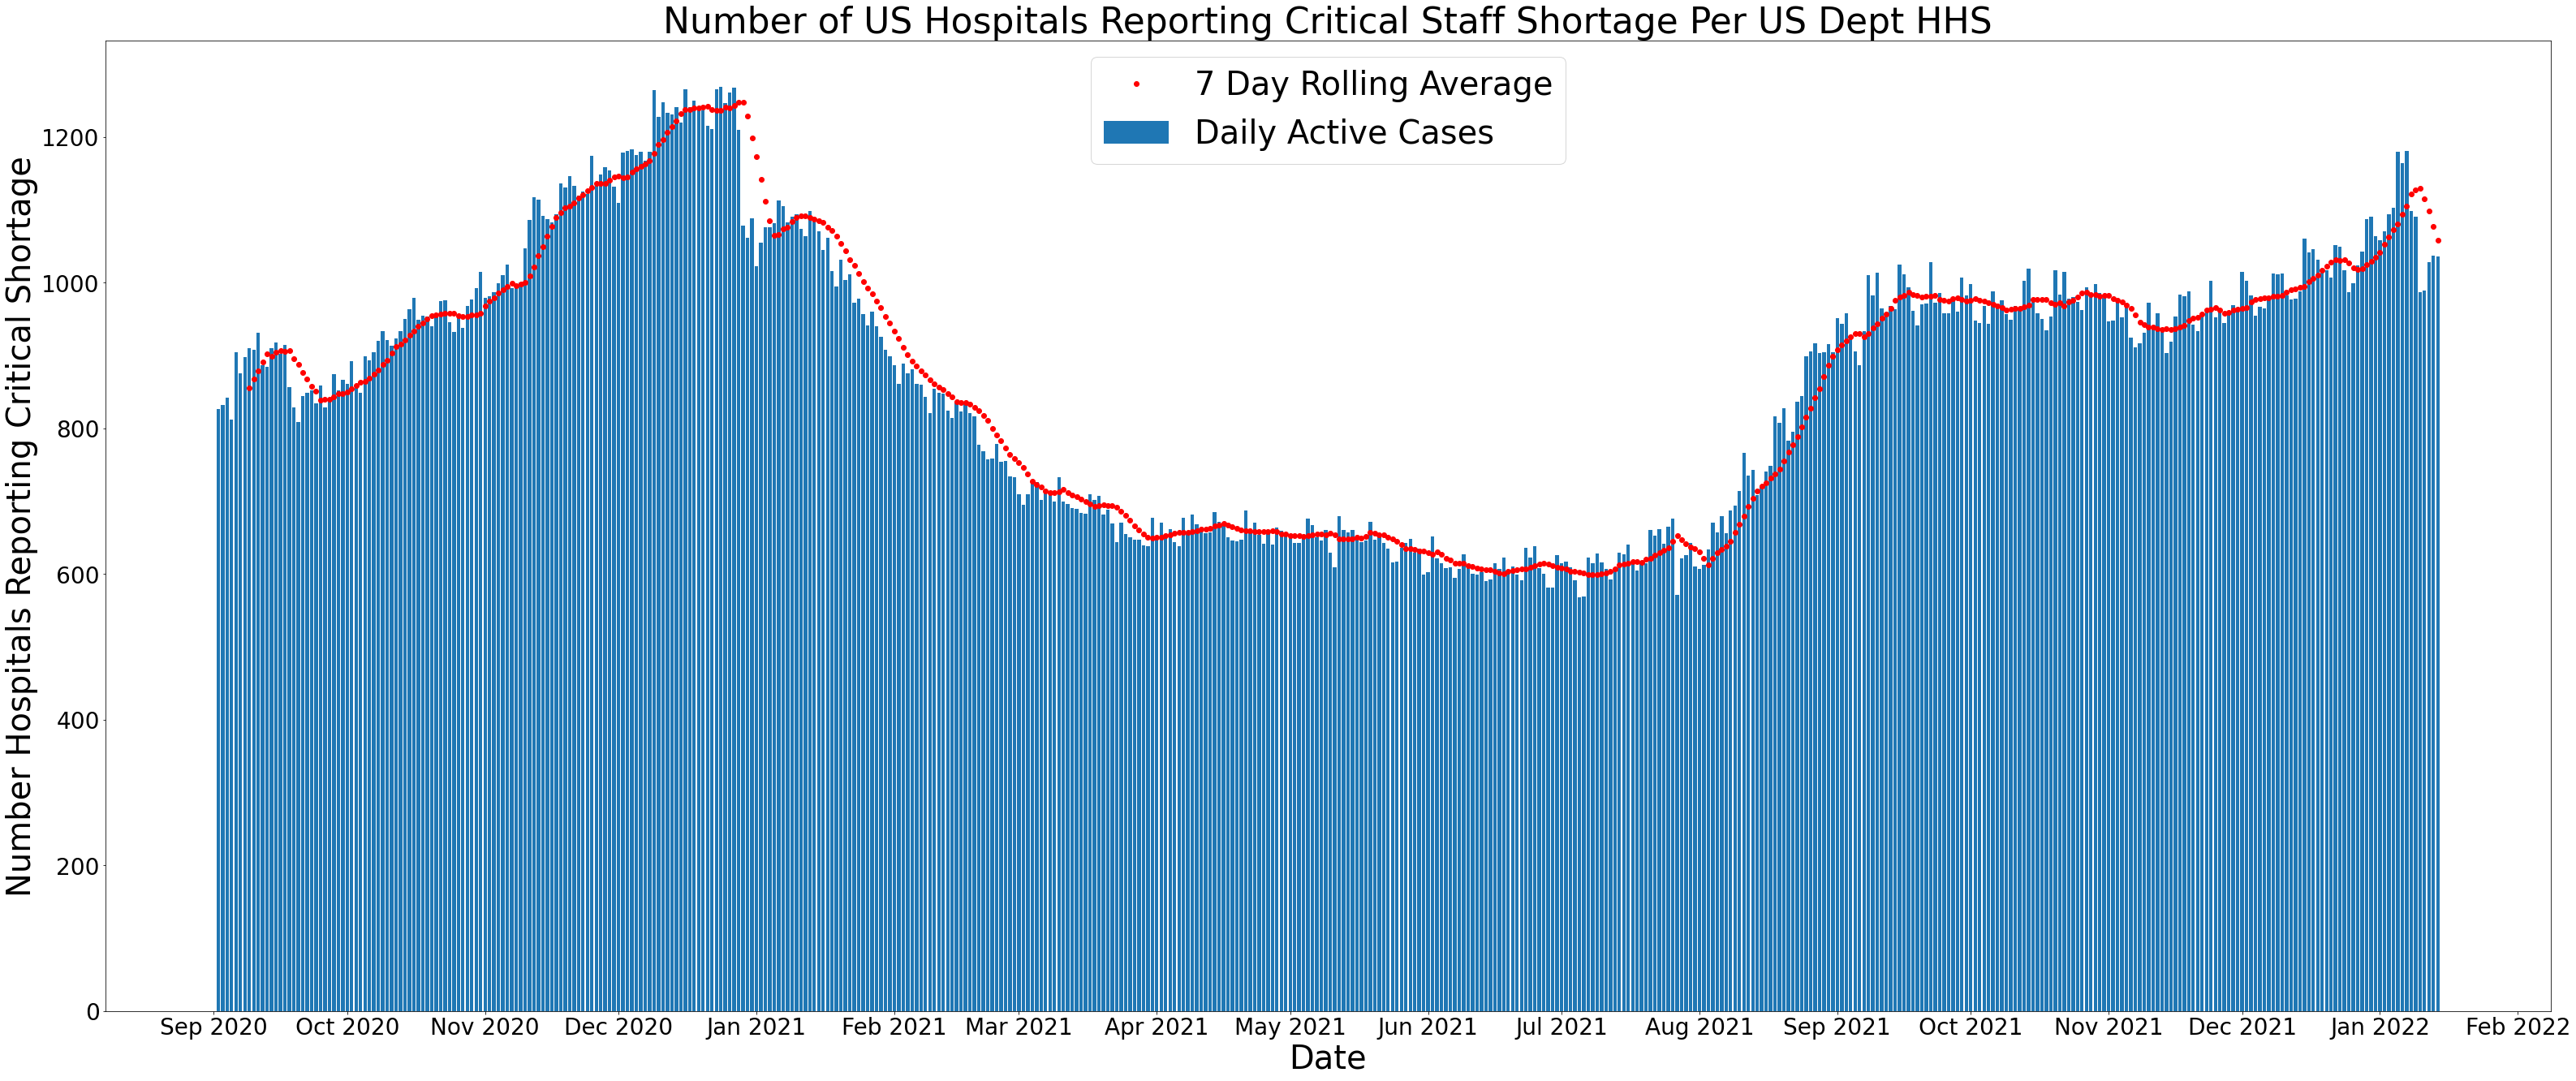

In [14]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Number of US Hospitals Reporting Critical Staff Shortage Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Number Hospitals Reporting Critical Shortage',color='black', fontsize = 40)
plt.bar(ccc.index, bbb.reported_critical_sum)
plt.plot(ccc_moving.reported_critical_sum, 'ro')
plt.legend(['7 Day Rolling Average','Daily Active Cases'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Critical Shortage'])
fig.savefig('HHS_critical_staffing_shortage_today.png')

In [15]:
for x in date_list:
    print(df_hhs[df_hhs.date == x]['deaths_covid'].sum())

0.0
29.0
29.0
29.0
29.0
29.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
6.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
2.0
1.0
3.0
2.0
4.0
4.0
8.0
12.0
8.0
10.0
17.0
21.0
18.0
34.0
97.0
52.0
64.0
80.0
258.0
413.0
640.0
826.0
960.0
1095.0
1017.0
1077.0
1098.0
1169.0
1264.0
1216.0
1225.0
1238.0
1378.0
1550.0
1182.0
1106.0
1145.0
1363.0
796.0
1020.0
963.0
1037.0
1077.0
1200.0
1131.0
1032.0
1081.0
1203.0
1289.0
1194.0
1302.0
1229.0
1067.0
1149.0
1118.0
1061.0
1114.0
1170.0
915.0
879.0
983.0
963.0
1036.0
1042.0
632.0
606.0
585.0
2729.0
2727.0
2767.0
2758.0
2782.0
2795.0
2734.0
2786.0
2738.0
2784.0
2743.0
2616.0
2543.0
2531.0
2578.0
2567.0
2697.0
371.0
431.0
376.0
343.0
397.0
379.0
385.0
407.0
331.0
284.0
299.0
351.0
338.0
294.0
303.0
259.0
256.0
264.0
371.0
319.0
359.0
406.0
404.0
410.0
443.0
485.0
434.0
437.0
362.0
437.0
4

In [16]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['deaths_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['deaths_covid'].sum()))

0.0
29.0
29.0
29.0
29.0
29.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
6.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
2.0
1.0
3.0
2.0
4.0
4.0
8.0
12.0
8.0
10.0
17.0
21.0
18.0
34.0
97.0
52.0
64.0
80.0
258.0
413.0
640.0
826.0
960.0
1095.0
1017.0
1077.0
1098.0
1169.0
1264.0
1216.0
1225.0
1238.0
1378.0
1550.0
1182.0
1106.0
1145.0
1363.0
796.0
1020.0
963.0
1037.0
1077.0
1200.0
1131.0
1032.0
1081.0
1203.0
1289.0
1194.0
1302.0
1229.0
1067.0
1149.0
1118.0
1061.0
1114.0
1170.0
915.0
879.0
983.0
963.0
1036.0
1042.0
632.0
606.0
585.0
2729.0
2727.0
2767.0
2758.0
2782.0
2795.0
2734.0
2786.0
2738.0
2784.0
2743.0
2616.0
2543.0
2531.0
2578.0
2567.0
2697.0
371.0
431.0
376.0
343.0
397.0
379.0
385.0
407.0
331.0
284.0
299.0
351.0
338.0
294.0
303.0
259.0
256.0
264.0
371.0
319.0
359.0
406.0
404.0
410.0
443.0
485.0
434.0
437.0
362.0
437.0
4

In [17]:
ccc.tail()

,reported_critical_sum
date,
2022-01-10,987
2022-01-11,989
2022-01-12,1028
2022-01-13,1037
2022-01-14,1036


In [18]:
df_deaths_covid = pd.DataFrame(aaa,columns=['date', 'deaths_covid'])

In [19]:
df_deaths_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          745 non-null    datetime64[ns]
 1   deaths_covid  745 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


In [20]:
ccc = df_deaths_covid.set_index('date')[-500::]
ccc_rolling = ccc.rolling(7).mean().shift()

In [21]:
ccc.tail()

,deaths_covid
date,
2022-01-10,1396.0
2022-01-11,1439.0
2022-01-12,1612.0
2022-01-13,1549.0
2022-01-14,1540.0


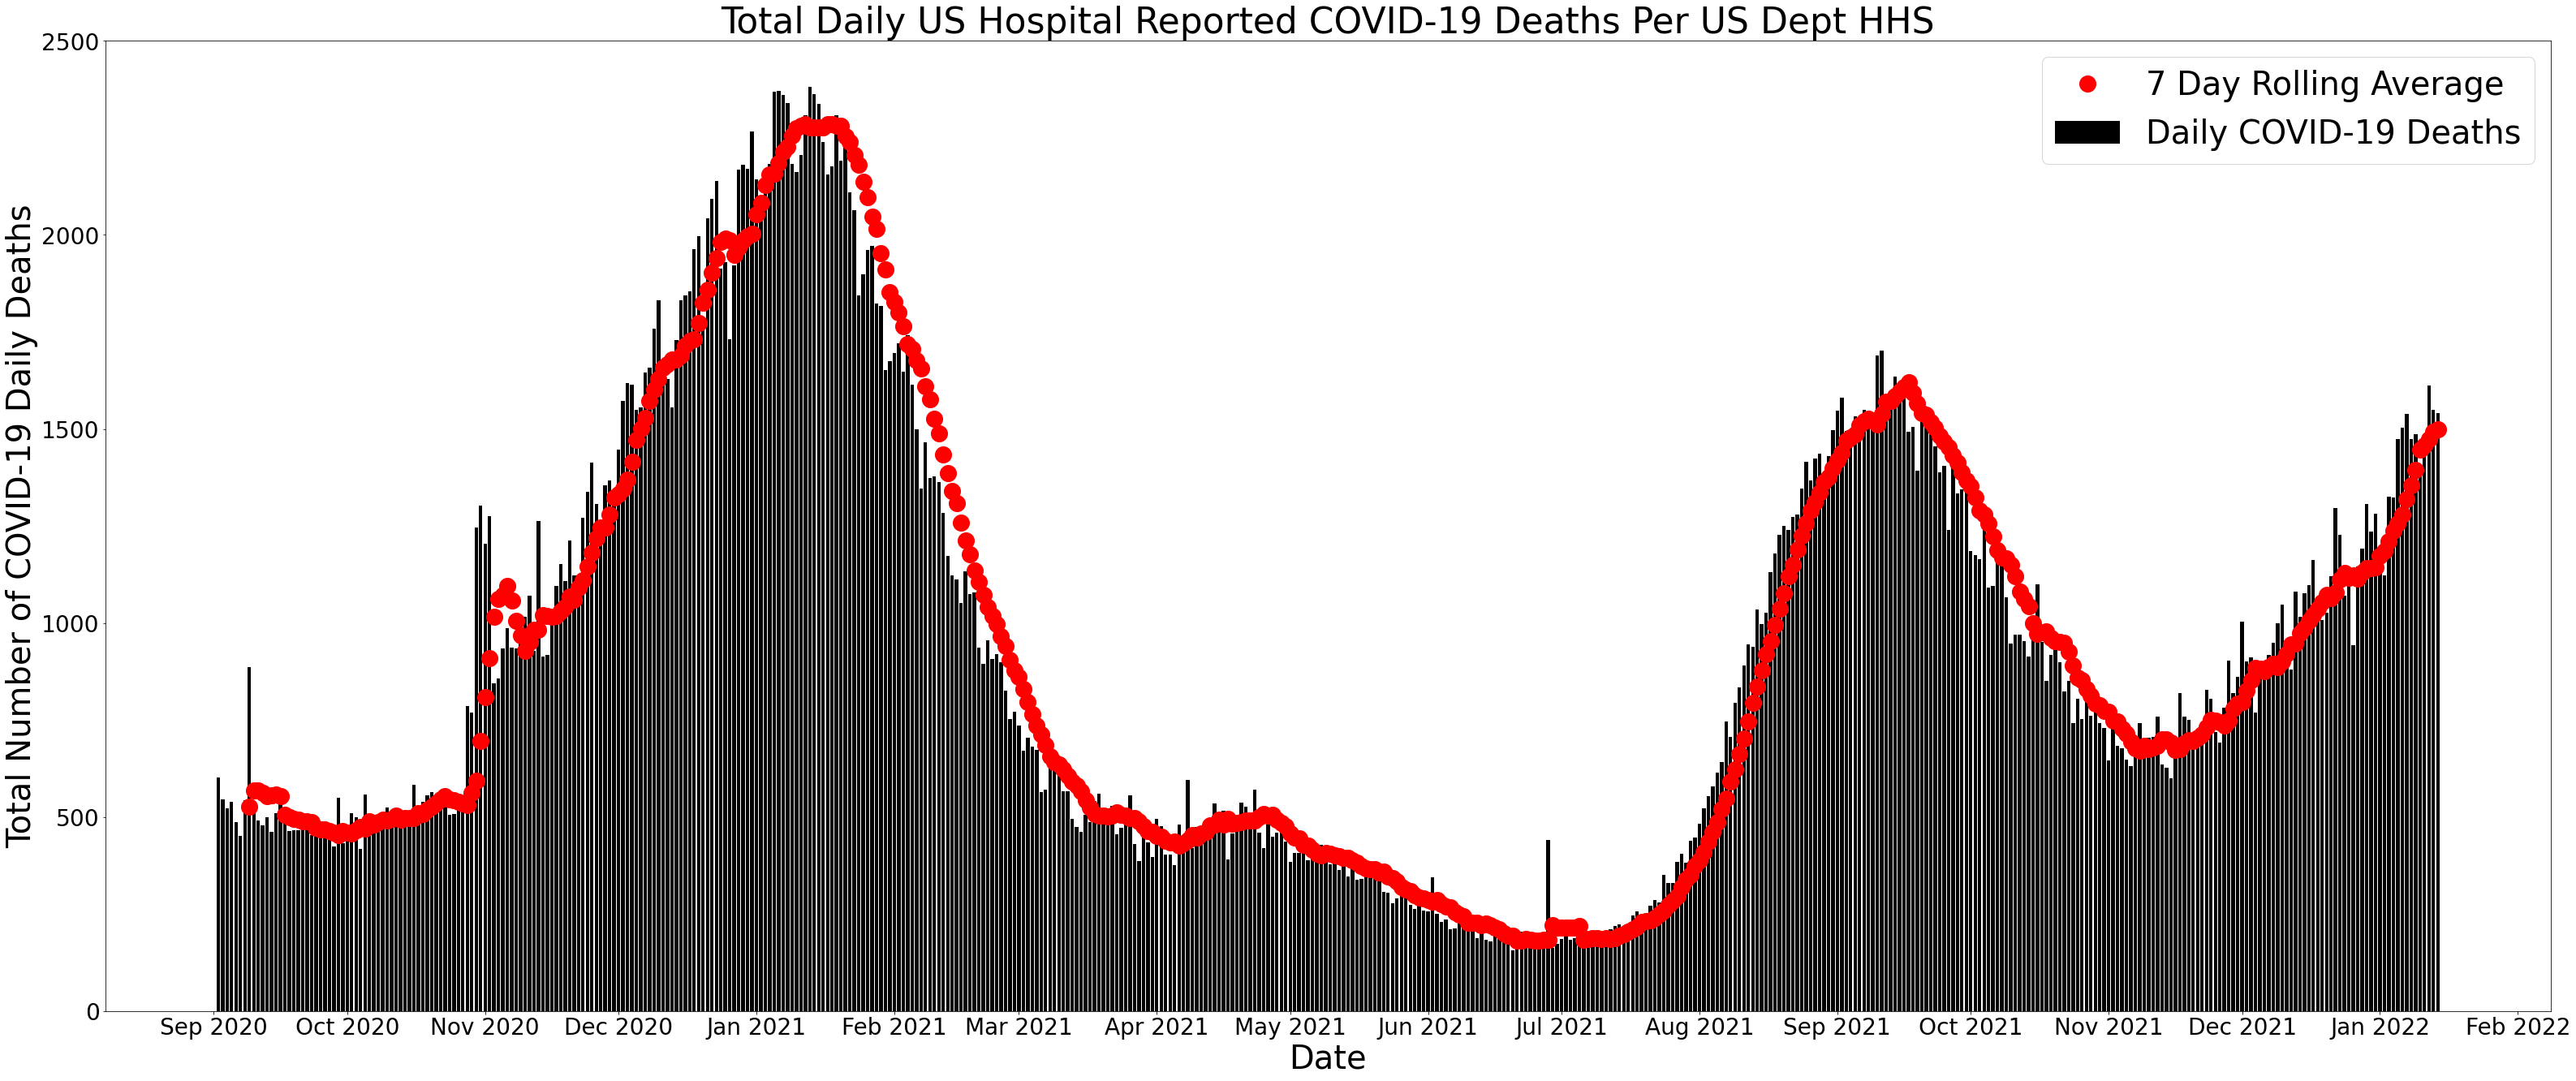

In [22]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Total Daily US Hospital Reported COVID-19 Deaths Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Total Number of COVID-19 Daily Deaths',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.deaths_covid, color = 'black')
plt.plot(ccc_rolling.deaths_covid, 'ro',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Deaths'])
fig.savefig('HHS_hospital_deaths.png')

In [23]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['hospital_onset_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['hospital_onset_covid'].sum()))
df_hospital_onset_covid = pd.DataFrame(aaa,columns=['date', 'hospital_onset_covid'])

0.0
33.0
33.0
33.0
33.0
33.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
20.0
21.0
22.0
22.0
24.0
25.0
31.0
32.0
33.0
37.0
39.0
39.0
44.0
46.0
45.0
43.0
54.0
53.0
64.0
71.0
78.0
96.0
171.0
319.0
347.0
414.0
418.0
447.0
479.0
524.0
435.0
453.0
525.0
428.0
415.0
642.0
723.0
667.0
738.0
597.0
527.0
515.0
734.0
811.0
778.0
876.0
2204.0
730.0
688.0
695.0
1020.0
1095.0
1134.0
1018.0
997.0
1012.0
1253.0
1283.0
1197.0
1241.0
1197.0
1133.0
1123.0
1366.0
1361.0
1466.0
1462.0
1322.0
1137.0
926.0
934.0
844.0
800.0
759.0
892.0
983.0
891.0
914.0
952.0
954.0
710.0
883.0
894.0
827.0
699.0
1226.0
1119.0
1021.0
895.0
881.0
604.0
651.0
973.0
1035.0
1062.0
1092.0
839.0
519.0
825.0
504.0
497.0
578.0
557.0
417.0
485.0
493.0
500.0
478.0
463.0
446.0
454.0
474.0
498.0
472.0
575.0
559.0
551.0
483.0
530.0
931.0


In [24]:
ccc = df_hospital_onset_covid.set_index('date')[-400::]
ccc_rolling = ccc.rolling(7).mean().shift()

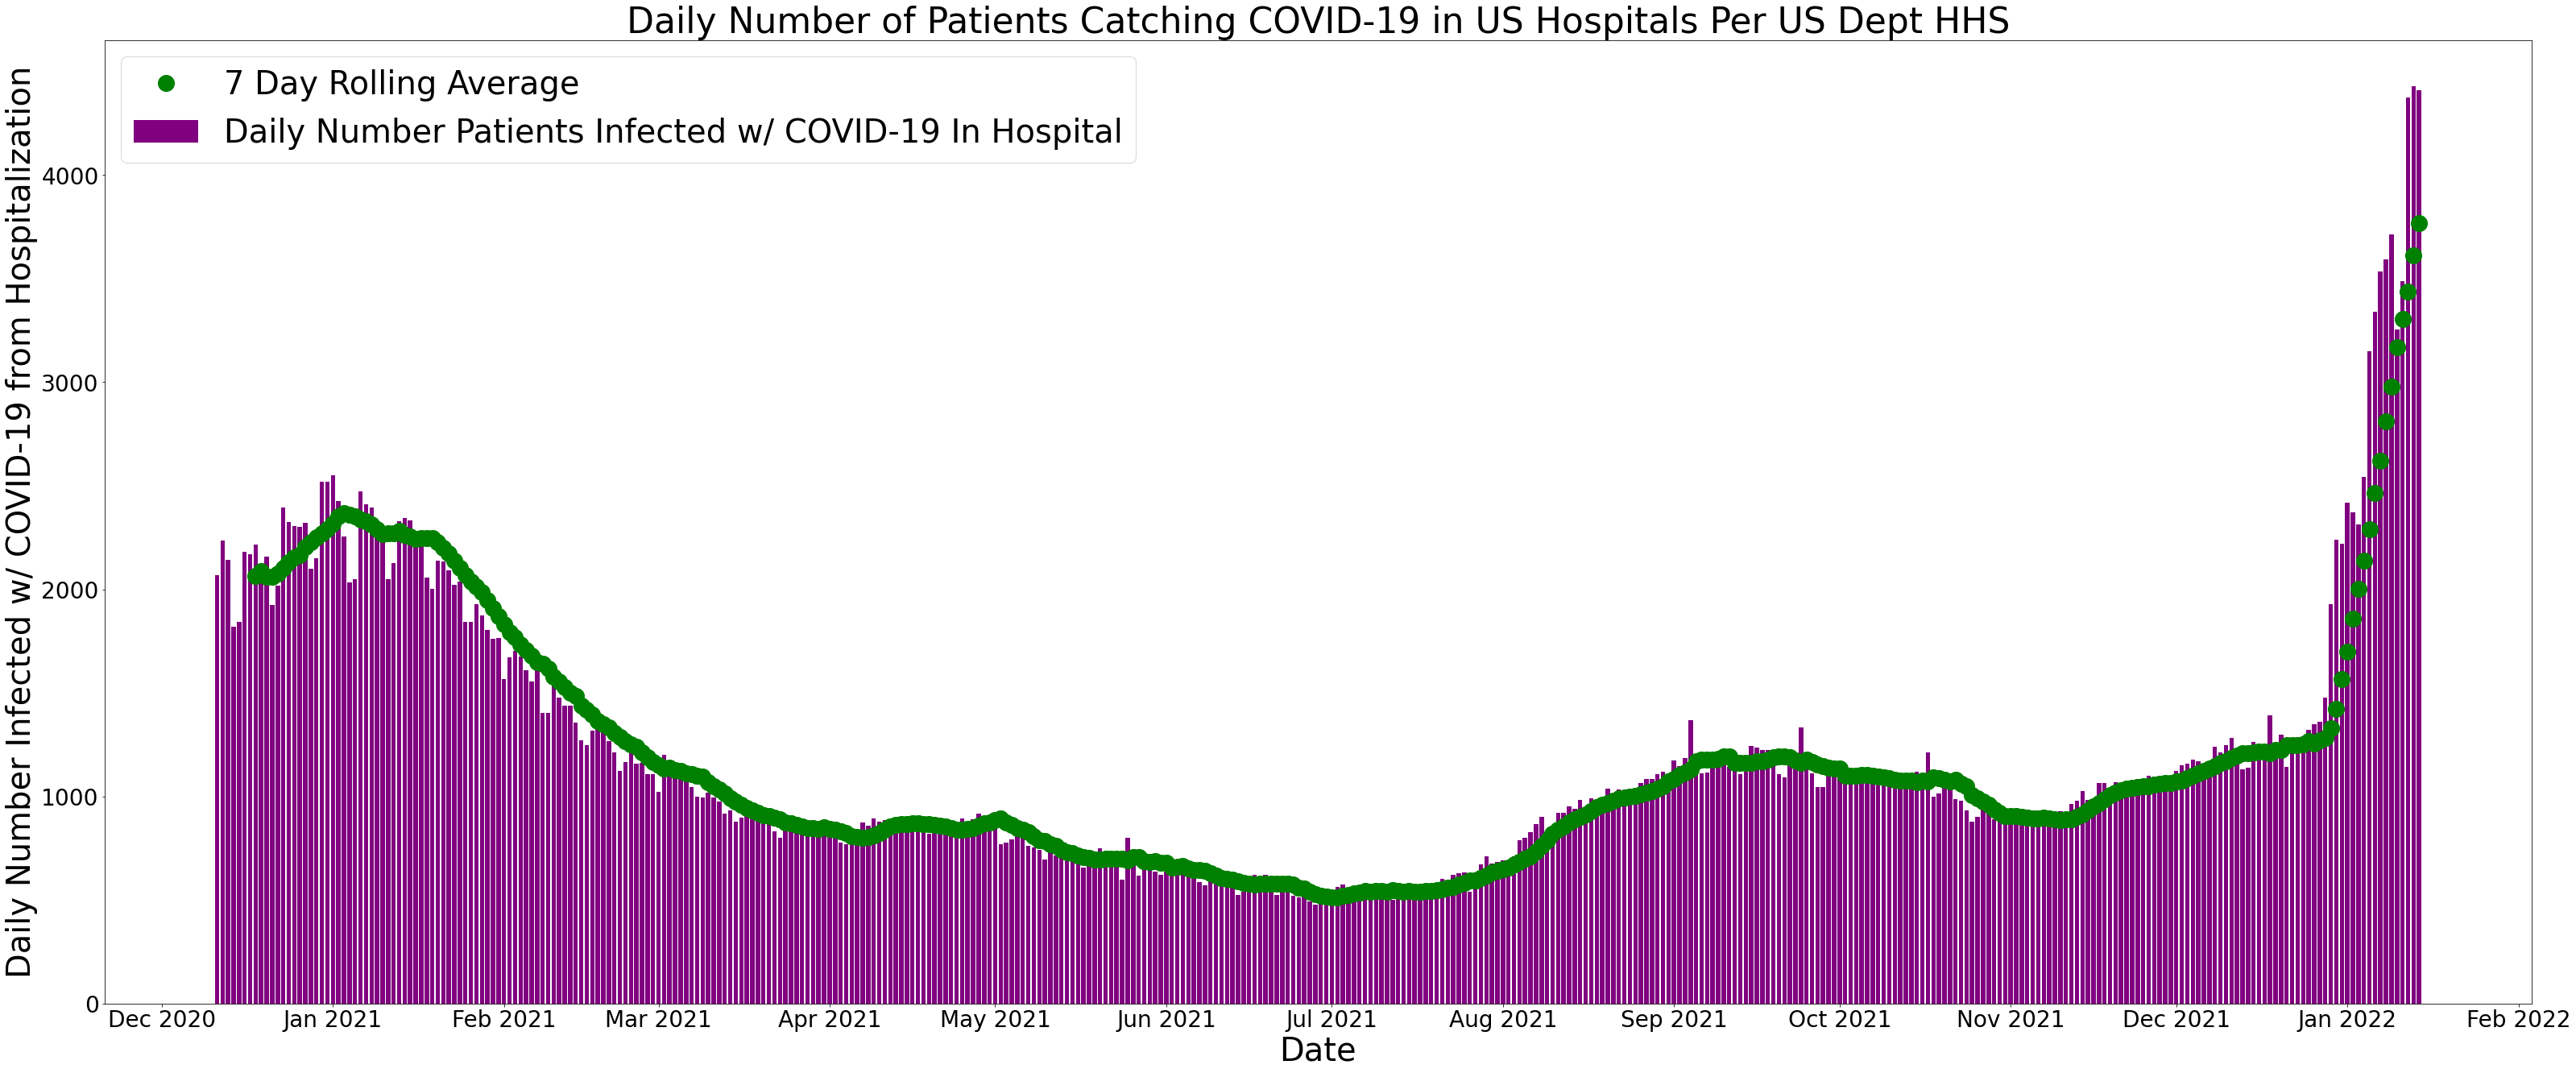

In [25]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number of Patients Catching COVID-19 in US Hospitals Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number Infected w/ COVID-19 from Hospitalization',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.hospital_onset_covid, color = 'purple')
plt.plot(ccc_rolling.hospital_onset_covid, 'go',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Patients Infected w/ COVID-19 In Hospital'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Deaths'])
fig.savefig('HHS_hospital_onset_covid.png')

In [26]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['inpatient_beds_used_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['inpatient_beds_used_covid'].sum()))
df_inpatient_beds_used_covid = pd.DataFrame(aaa,columns=['date', 'inpatient_beds_used_covid'])

0.0
1877.0
1877.0
1877.0
1877.0
1877.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
14.0
14.0
14.0
14.0
14.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
6.0
8.0
9.0
9.0
16.0
18.0
17.0
127.0
154.0
193.0
270.0
346.0
402.0
535.0
631.0
707.0
880.0
1067.0
1128.0
1273.0
1342.0
1807.0
2027.0
2369.0
2773.0
3900.0
5441.0
6671.0
13584.0
21634.0
27901.0
32080.0
37543.0
38387.0
38069.0
41867.0
43596.0
45027.0
44687.0
44989.0
44153.0
44543.0
48915.0
52690.0
53443.0
53862.0
53101.0
51225.0
50848.0
55416.0
57740.0
55138.0
56996.0
58196.0
57933.0
58038.0
58138.0
58543.0
59313.0
57676.0
56738.0
55289.0
54159.0
56043.0
56684.0
54716.0
54182.0
52640.0
56001.0
49999.0
51805.0
60159.0
58515.0
56780.0
56112.0
53208.0
48269.0
49699.0
49513.0
49243.0
47627.0
46253.0
45336.0
43972.0
44474.0
46443.0
46750.0
47355.0
44569.0
42708.0
41359.0
42239.0
43661.0
44272.0
43883.0
44031.0
42131.0
40634.0
41387.0


In [27]:
ccc = df_inpatient_beds_used_covid.set_index('date')
ccc_rolling = ccc.rolling(7).mean().shift()

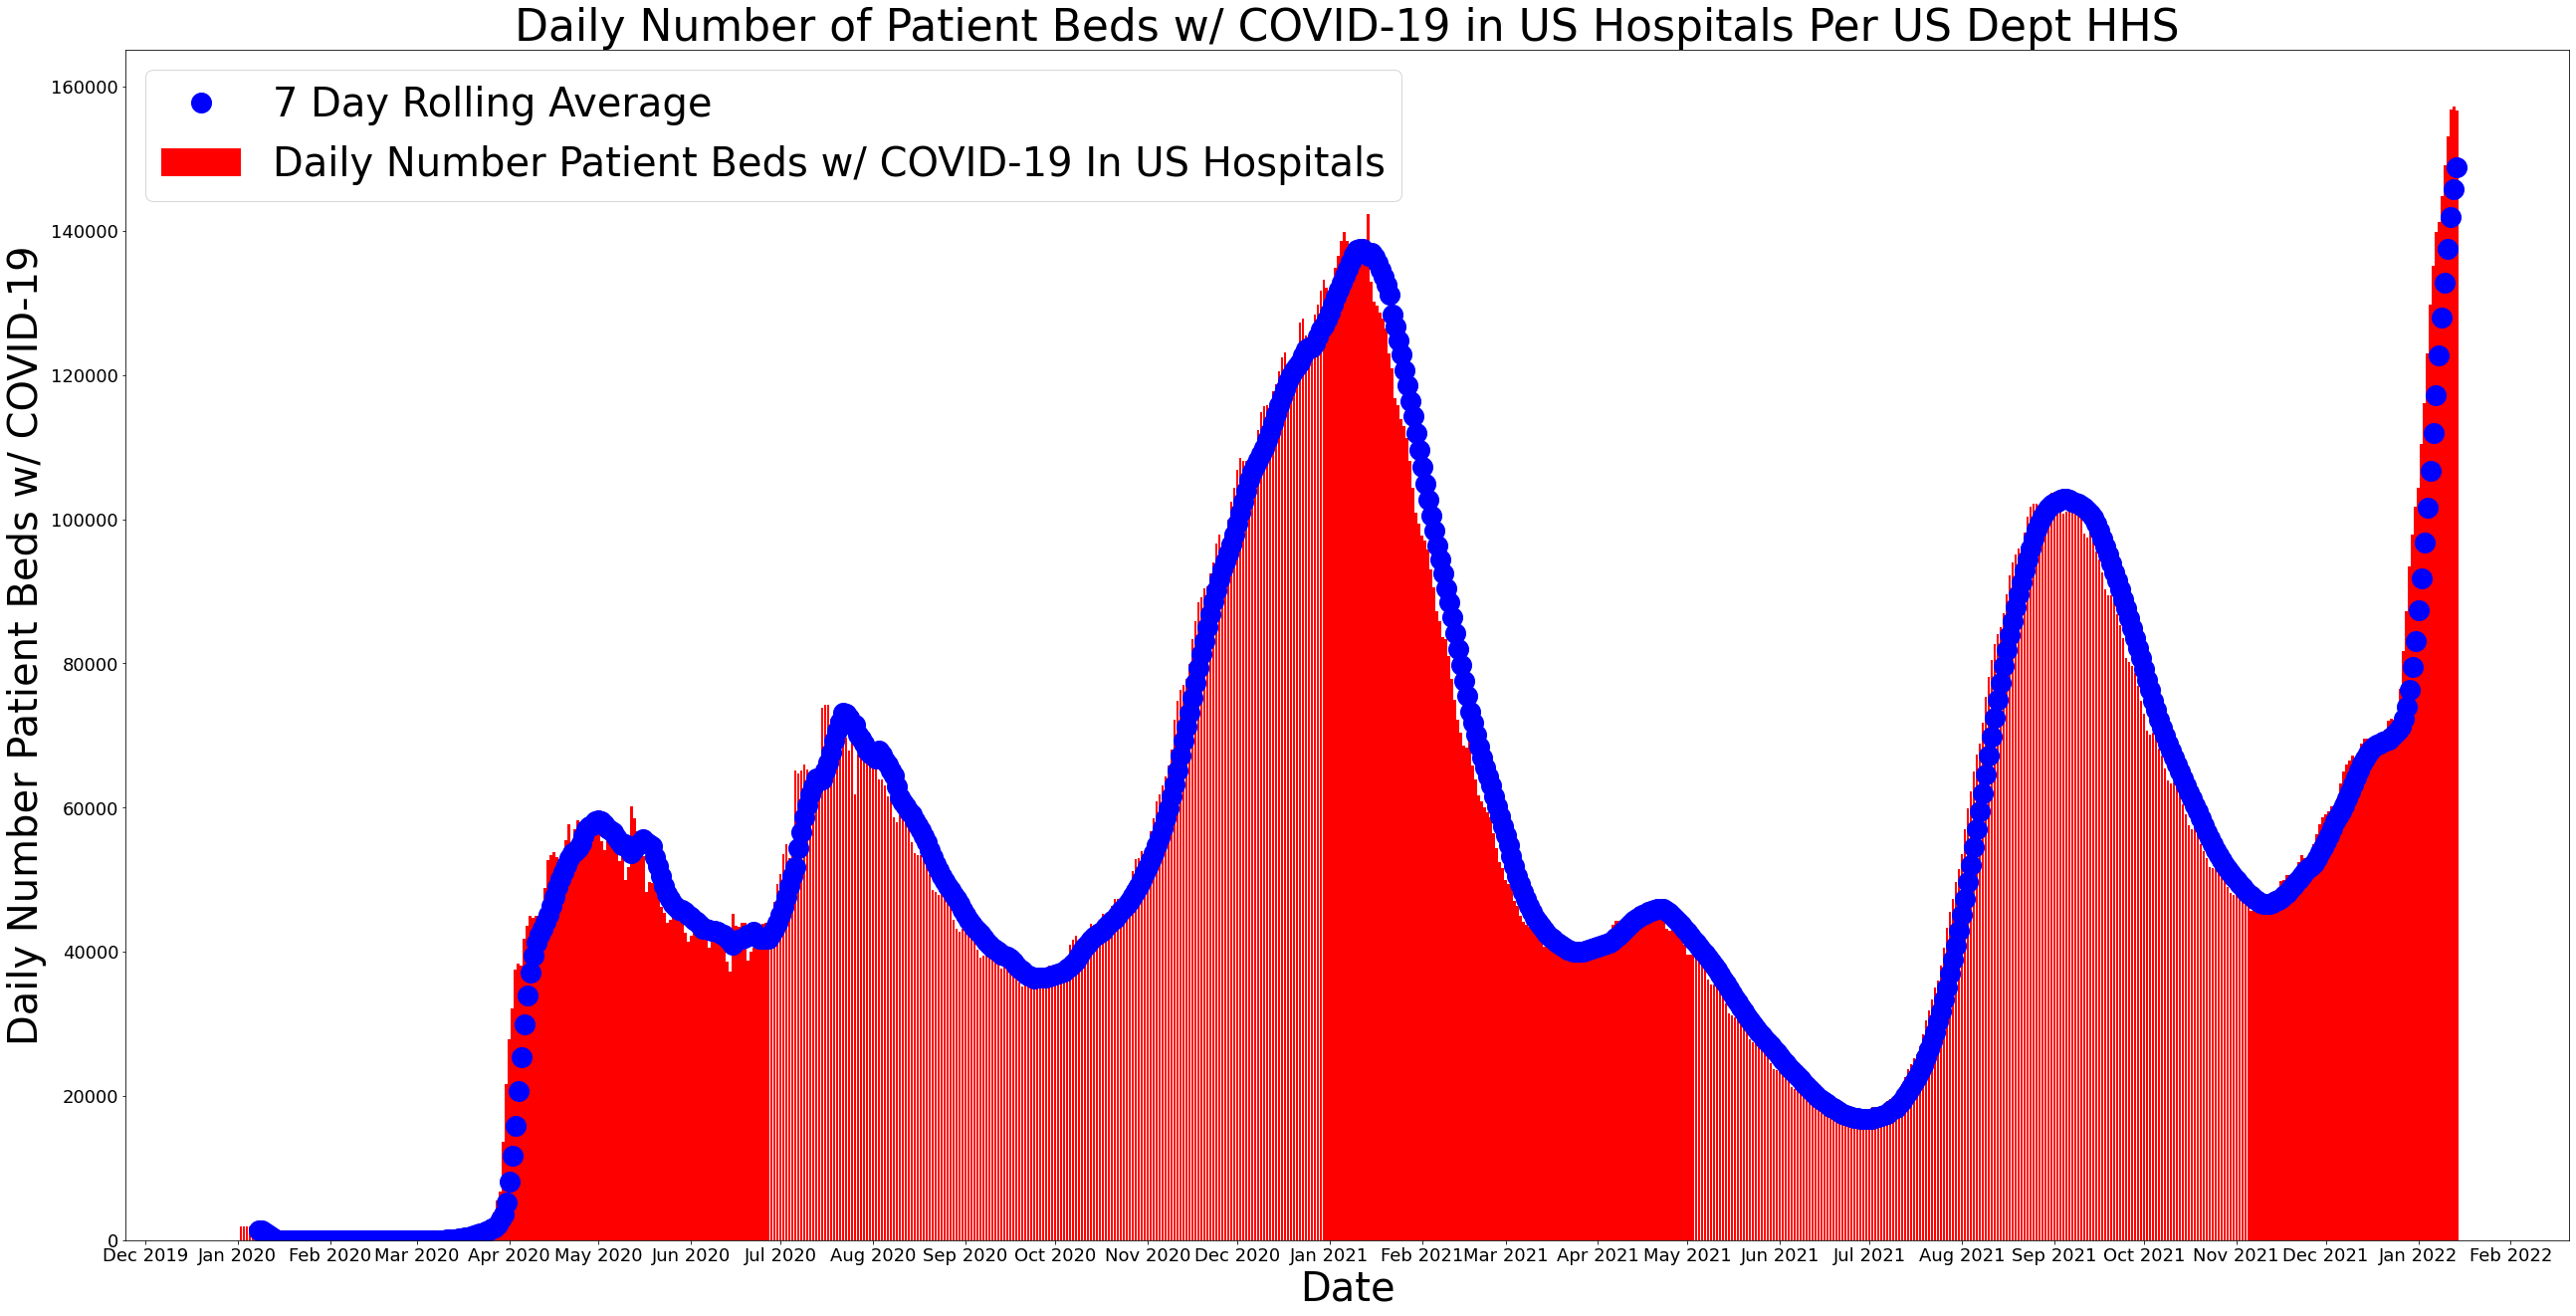

In [28]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(44,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=18)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number of Patient Beds w/ COVID-19 in US Hospitals Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number Patient Beds w/ COVID-19',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.inpatient_beds_used_covid, color = 'red')
plt.plot(ccc_rolling.inpatient_beds_used_covid, 'bo',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Patient Beds w/ COVID-19 In US Hospitals'], fontsize = 40)
fig.savefig('HHS_inpaitent_beds_covid.png')

In [29]:
ccc.tail()

,inpatient_beds_used_covid
date,
2022-01-10,149081.0
2022-01-11,153100.0
2022-01-12,156875.0
2022-01-13,157269.0
2022-01-14,156705.0


In [30]:
df_hhs.total_pediatric_patients_hospitalized_confirmed_and_suspected_covid

0           0.0
1           0.0
2           0.0
3           1.0
4           1.0
5           1.0
6           2.0
7           2.0
8           2.0
9           3.0
10         10.0
11          0.0
12          4.0
13          2.0
14          0.0
15         16.0
16          1.0
17          7.0
18          4.0
19         19.0
20          3.0
21          6.0
22          0.0
23          8.0
24         32.0
25         10.0
26          2.0
27          0.0
28          1.0
29          7.0
30          3.0
31          6.0
32          0.0
33          0.0
34         22.0
35          7.0
36         12.0
37          5.0
38          2.0
39          NaN
40          NaN
41          NaN
42          NaN
43         13.0
44          6.0
45          NaN
46          NaN
47          NaN
48          NaN
49          NaN
50          NaN
51          NaN
52          NaN
53          NaN
54          NaN
55          NaN
56          NaN
57          NaN
58          NaN
59          NaN
60          1.0
61          4.0
62      

In [31]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum()))
df_total_pediatric_patients_hospitalized_confirmed_and_suspected_covid = pd.DataFrame(aaa,columns=['date', 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'])

0.0
4.0
4.0
4.0
4.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
26.0
26.0
26.0
26.0
26.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
20.0
0.0
0.0
0.0
0.0
1106.0
1152.0
1993.0
1947.0
2537.0
1362.0
2112.0
2105.0
2003.0
1974.0
4129.0
1620.0
1734.0
2241.0
2408.0
2105.0
1930.0
1953.0
4253.0
1818.0
1845.0
2056.0
1898.0
2034.0
2064.0
1855.0
1980.0
2183.0
1986.0
2056.0


In [32]:
df_total_pediatric_patients_hospitalized_confirmed_and_suspected_covid.tail()

,date,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid
740,2022-01-10,4544.0
741,2022-01-11,4804.0
742,2022-01-12,5104.0
743,2022-01-13,5231.0
744,2022-01-14,5215.0


In [33]:
ccc = df_total_pediatric_patients_hospitalized_confirmed_and_suspected_covid.set_index('date')[-520::]
ccc_rolling = ccc.rolling(7).mean().shift()

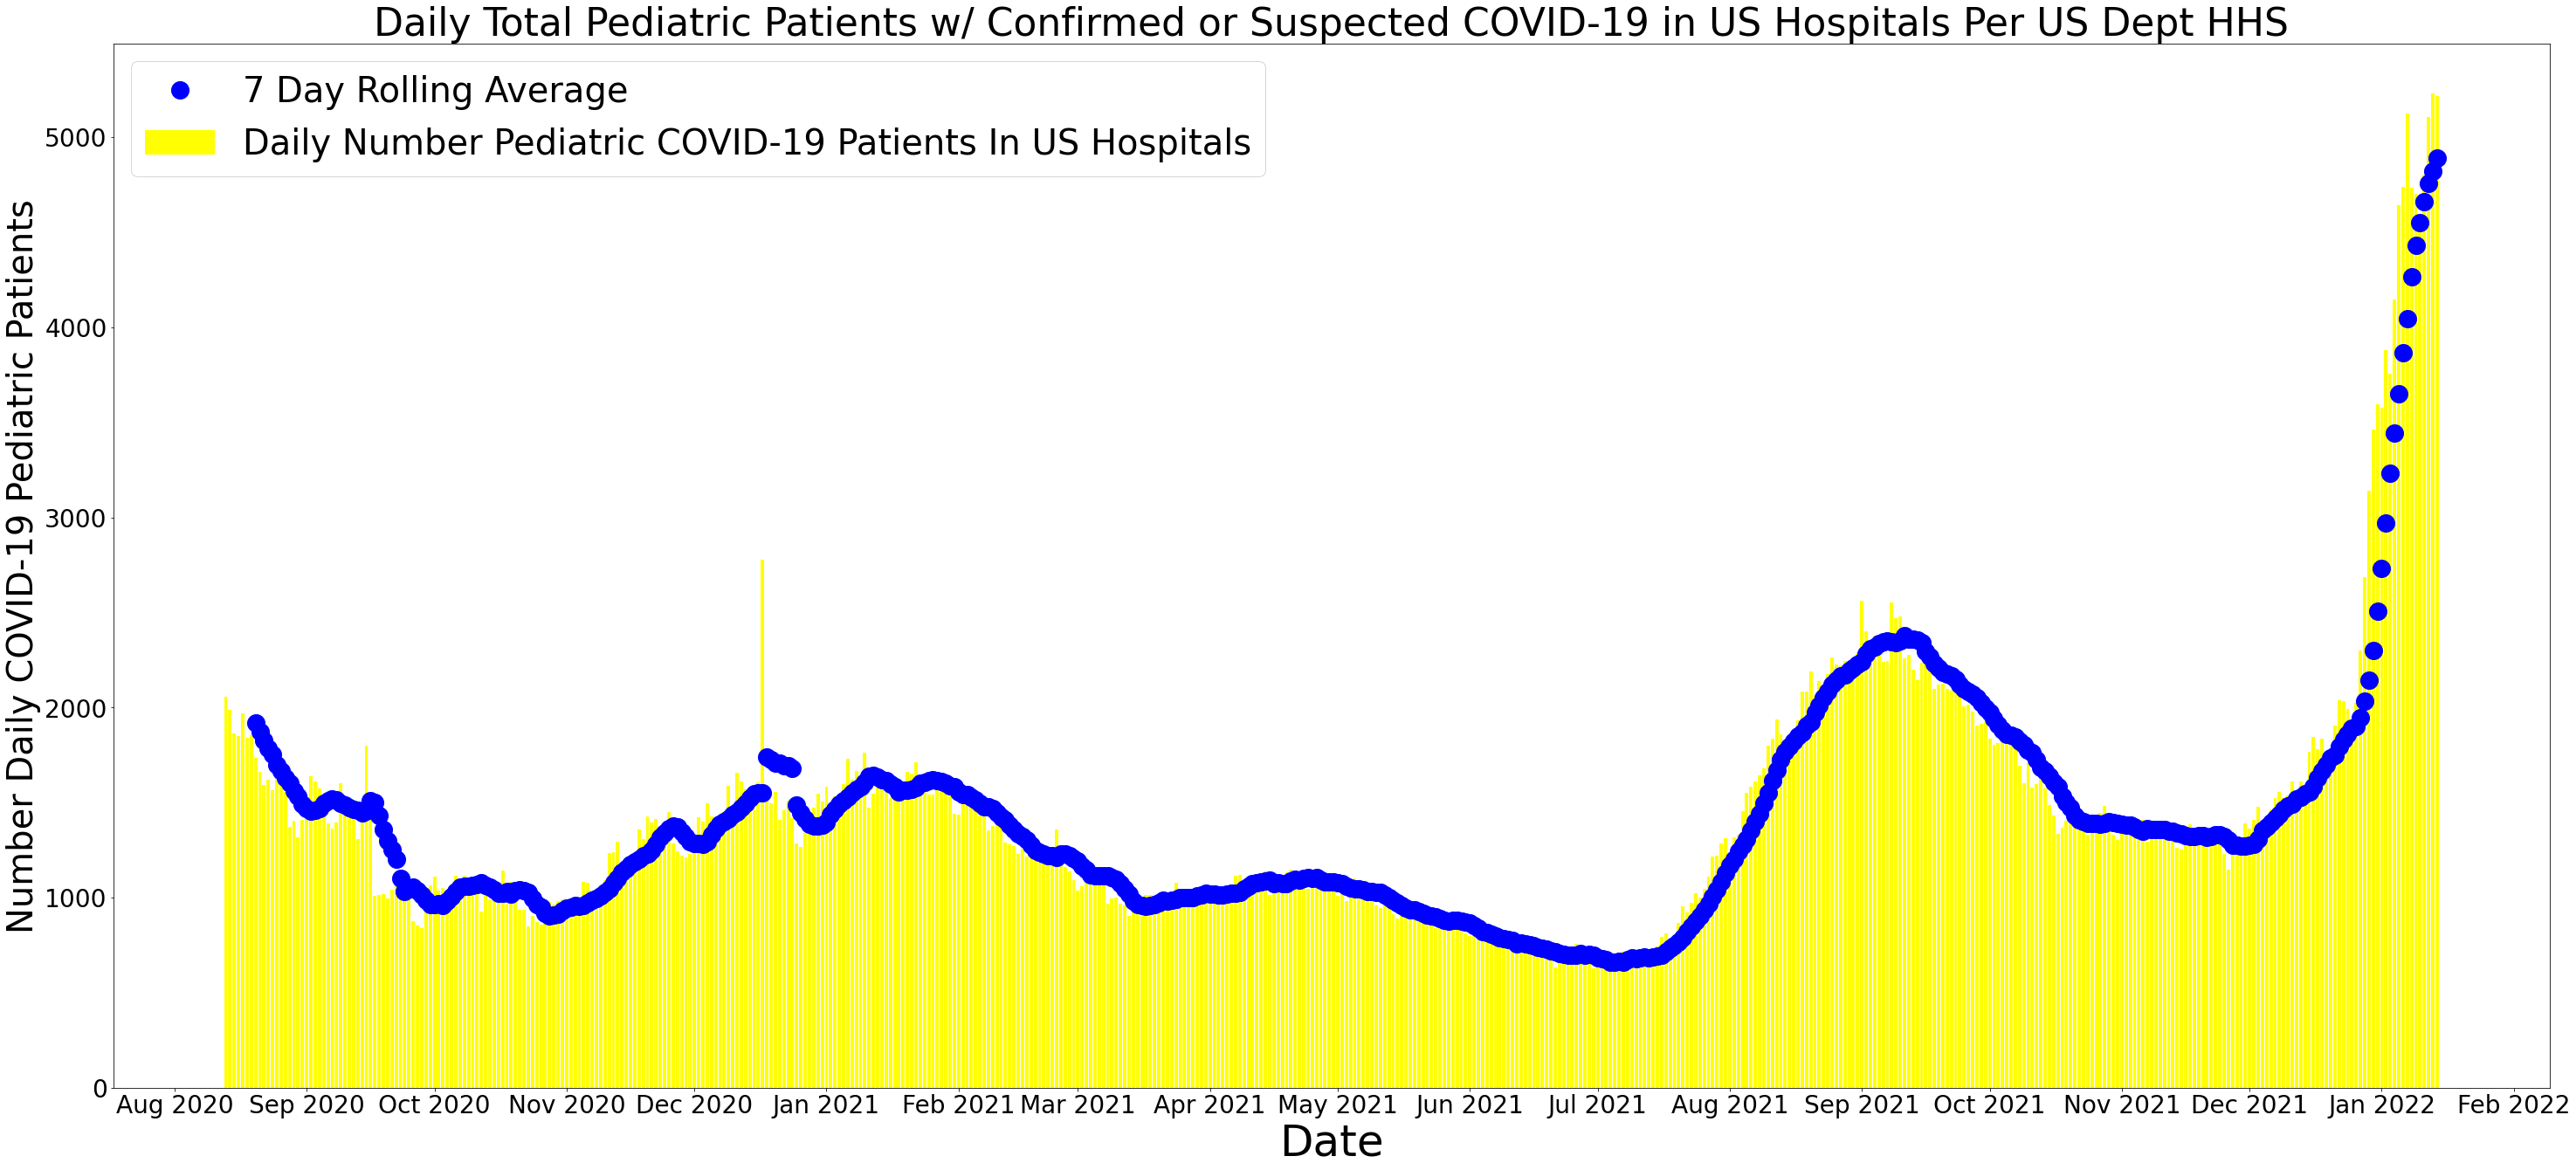

In [34]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(50,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
plt.title('Daily Total Pediatric Patients w/ Confirmed or Suspected COVID-19 in US Hospitals Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 50)
plt.ylabel('Number Daily COVID-19 Pediatric Patients',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.total_pediatric_patients_hospitalized_confirmed_and_suspected_covid, color = 'yellow')
plt.plot(ccc_rolling.total_pediatric_patients_hospitalized_confirmed_and_suspected_covid, 'bo',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Pediatric COVID-19 Patients In US Hospitals'], fontsize = 40)
fig.savefig('HHS_total_pediatric.png')

adult_icu_bed_covid_utilization

In [35]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['adult_icu_bed_covid_utilization'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['adult_icu_bed_covid_utilization'].sum()))
df_adult_icu_bed_covid_utilization = pd.DataFrame(aaa,columns=['date', 'adult_icu_bed_covid_utilization'])

0.0
0.471760797342193
0.471760797342193
0.471760797342193
0.471760797342193
0.471760797342193
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.076458752515091
0.076458752515091
0.076458752515091
0.077551020408163
0.077551020408163
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.1
0.071047957371226
0.231075697211155
0.241273100616016
0.231707317073171
0.234641006661732
8.1912

11.927976980920437
11.937803744035813
12.012173183600536
11.926823456055372
12.01591222852639
12.090739240891153
11.994554912562137
11.958282763623526
12.123690350037496
12.120602315152968
12.196745284300443
12.527294901102723
12.56024530780429
12.564197243147836
12.97599704550758
12.951263009267272
13.081918072368858
13.258101307474945
13.58969289807143
14.005766720504921
14.209353978662898
14.379378383962264
14.664671867995445
14.94555720022565
15.132272750179707
15.615445307818385
15.968288496266586
16.341001894977314
16.44185731329878
16.41091196162563
16.438296975622787


staffed_icu_adult_patients_confirmed_and_suspected_covid 

In [36]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['staffed_icu_adult_patients_confirmed_and_suspected_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['staffed_icu_adult_patients_confirmed_and_suspected_covid'].sum()))
df_staffed_icu_adult_patients_confirmed_and_suspected_covid = pd.DataFrame(aaa,columns=['date', 'staffed_icu_adult_patients_confirmed_and_suspected_covid'])

0.0
426.0
426.0
426.0
426.0
426.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
38.0
38.0
38.0
38.0
38.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
3.0
44.0
234.0
237.0
231.0
321.0
10655.0
11194.0
12014.0
12178.0
11319.0
12520.0
12873.0
13913.0
15960.0
15764.0
16171.0
14530.0
16557.0
16938.0
16254.0
16939.0
16824.0
16664.0
16354.0
16555.0
16492.0
16349.0
16158.0
16104.0


In [37]:
ccc = df_staffed_icu_adult_patients_confirmed_and_suspected_covid.set_index('date')[-500::]
ccc_rolling = ccc.rolling(7).mean().shift()

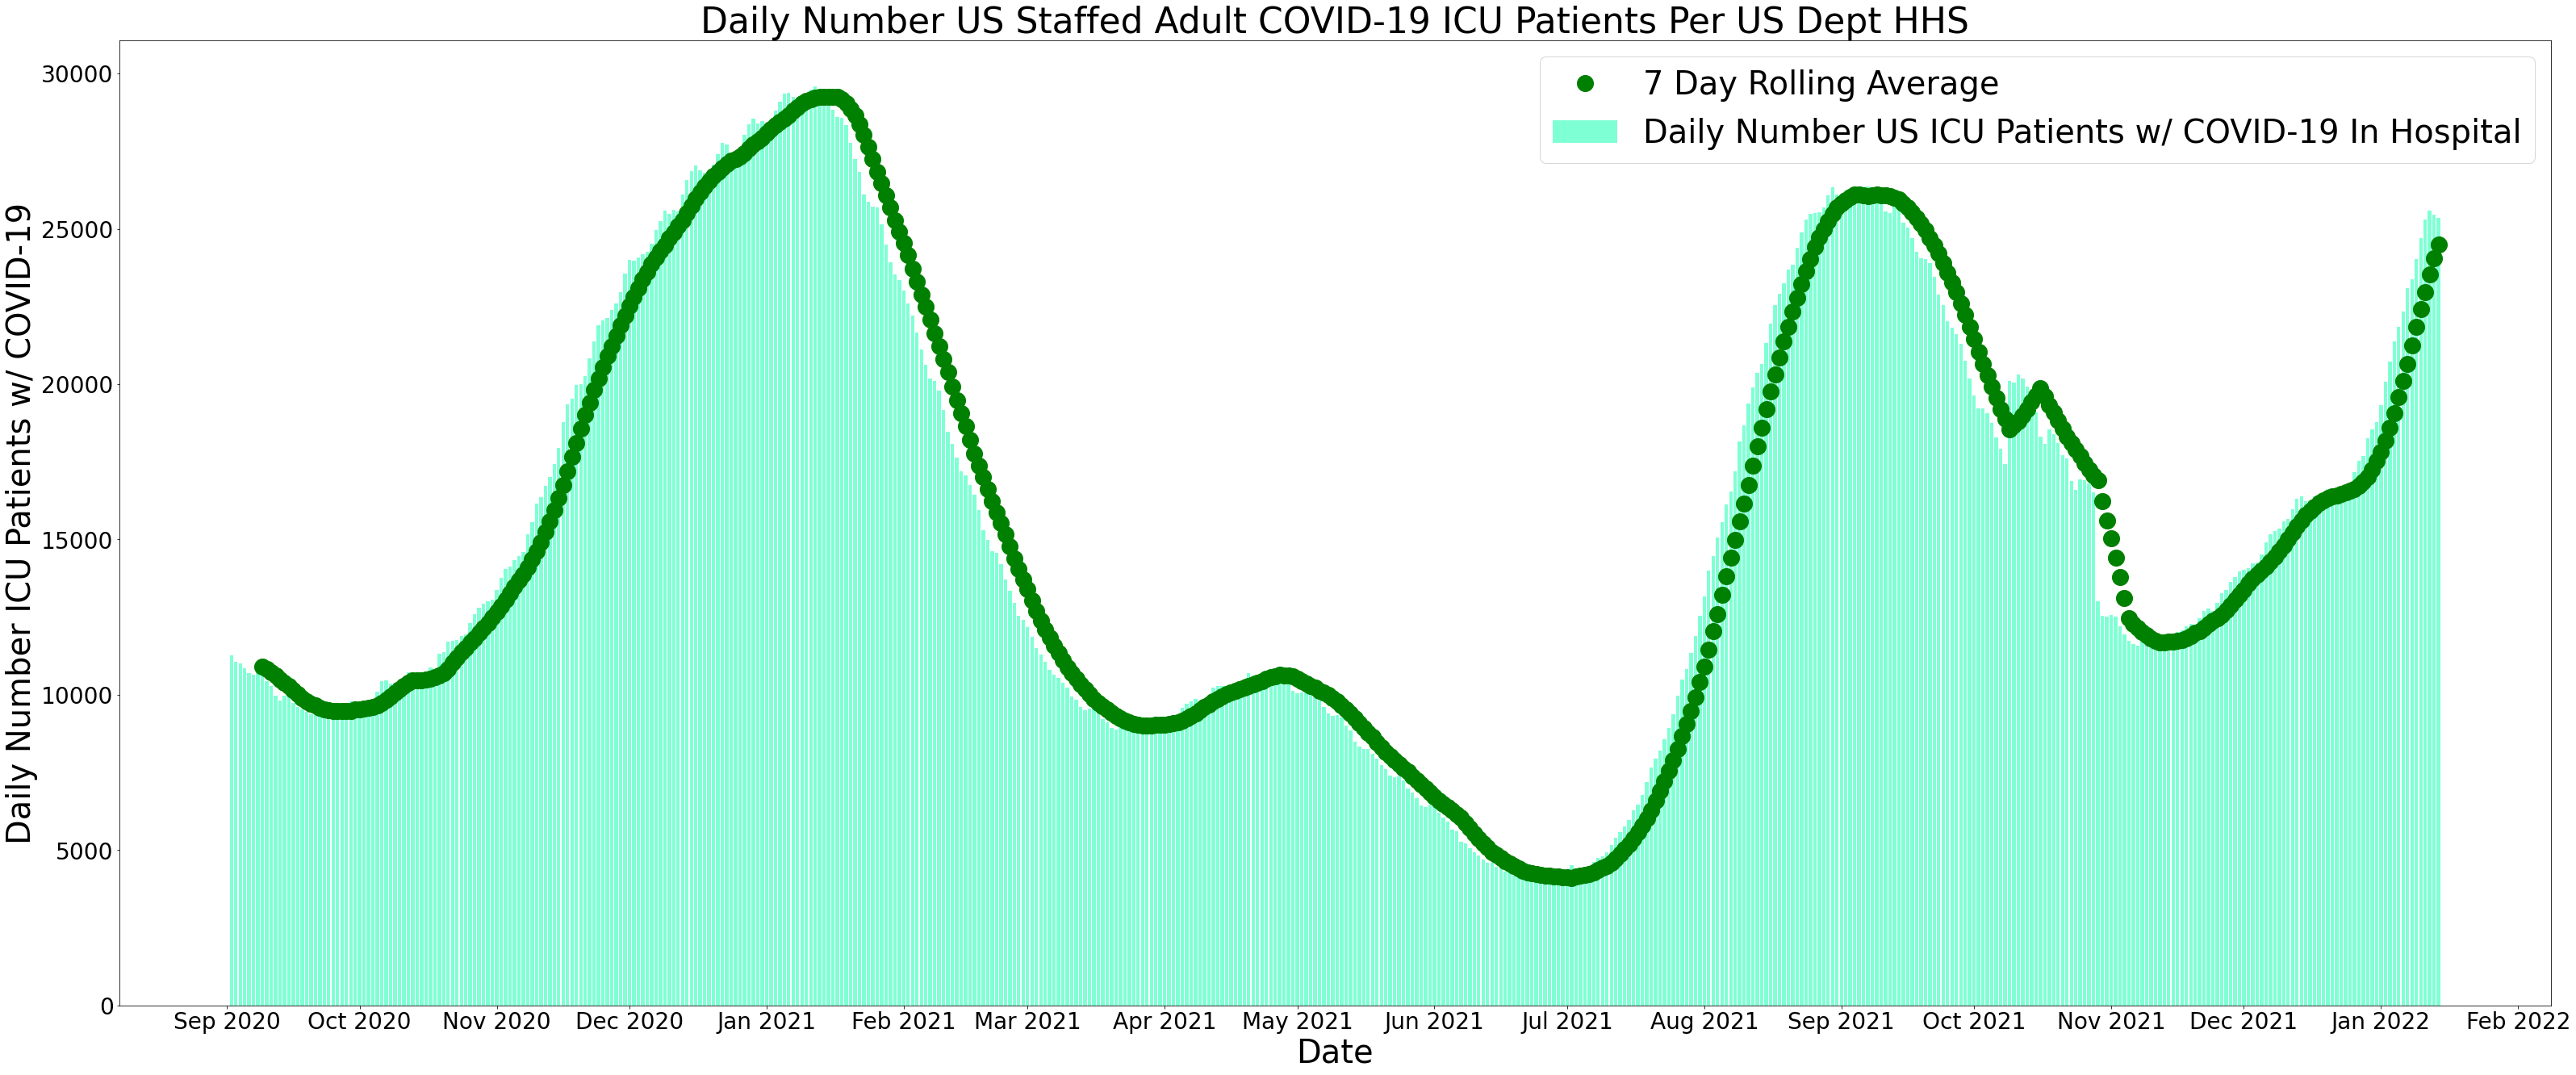

In [38]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number US Staffed Adult COVID-19 ICU Patients Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number ICU Patients w/ COVID-19',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.staffed_icu_adult_patients_confirmed_and_suspected_covid, color = 'aquamarine')
plt.plot(ccc_rolling.staffed_icu_adult_patients_confirmed_and_suspected_covid, 'go',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number US ICU Patients w/ COVID-19 In Hospital'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Deaths'])
fig.savefig('HHS_staffed_adult_ICU.png')

previous_day_admission_adult_covid_confirmed 

In [39]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['previous_day_admission_adult_covid_confirmed'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['previous_day_admission_adult_covid_confirmed'].sum()))
df_previous_day_admission_adult_covid_confirmed = pd.DataFrame(aaa,columns=['date', 'previous_day_admission_adult_covid_confirmed'])

0.0
132.0
132.0
132.0
132.0
132.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
2.0
3.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
0.0
74.0
76.0
64.0
74.0
133.0
102.0
123.0
113.0
104.0
56.0
38.0
86.0
67.0
83.0
66.0
48.0
0.0
50.0
68.0
65.0
41.0
48.0
44.0
68.0
111.0
101.0
103.0
82.0
78.0
66.0
27.0
64.0
74.0
82.0
60.0
53.0
54.0
60.0
71.0
62.0
93.0
66.0
63.0
69.0
82.0
60.0
21.0
58.0
46.0
46.0
39.0
46.0
46.0
46.0
40.0
40.0
34.0
27.0
23.0
30.0
27.0
27.0
32.0
23.0
20.0
54.0
59.0
48.0
44.0
40.0
25.0
34.0
29.0
36.0
39.0
43.0
45.0
51.0
68.0
61.0
67.0
92.0
86.0
86.0
113.0
145.0
128.0
115.0
128.0
113.0
104.0
110.0
114.0
137.0
140.0
194.0
168.0
174.0
221.0
349.0
3681.0
4382.0
4714.0
4378.0
3509.0
3918.0
4935.0
4382.0
4720.0
4950.0
5338.0
4398.0

In [40]:
ccc = df_previous_day_admission_adult_covid_confirmed.set_index('date')[-500::]
ccc_rolling = ccc.rolling(7).mean().shift()

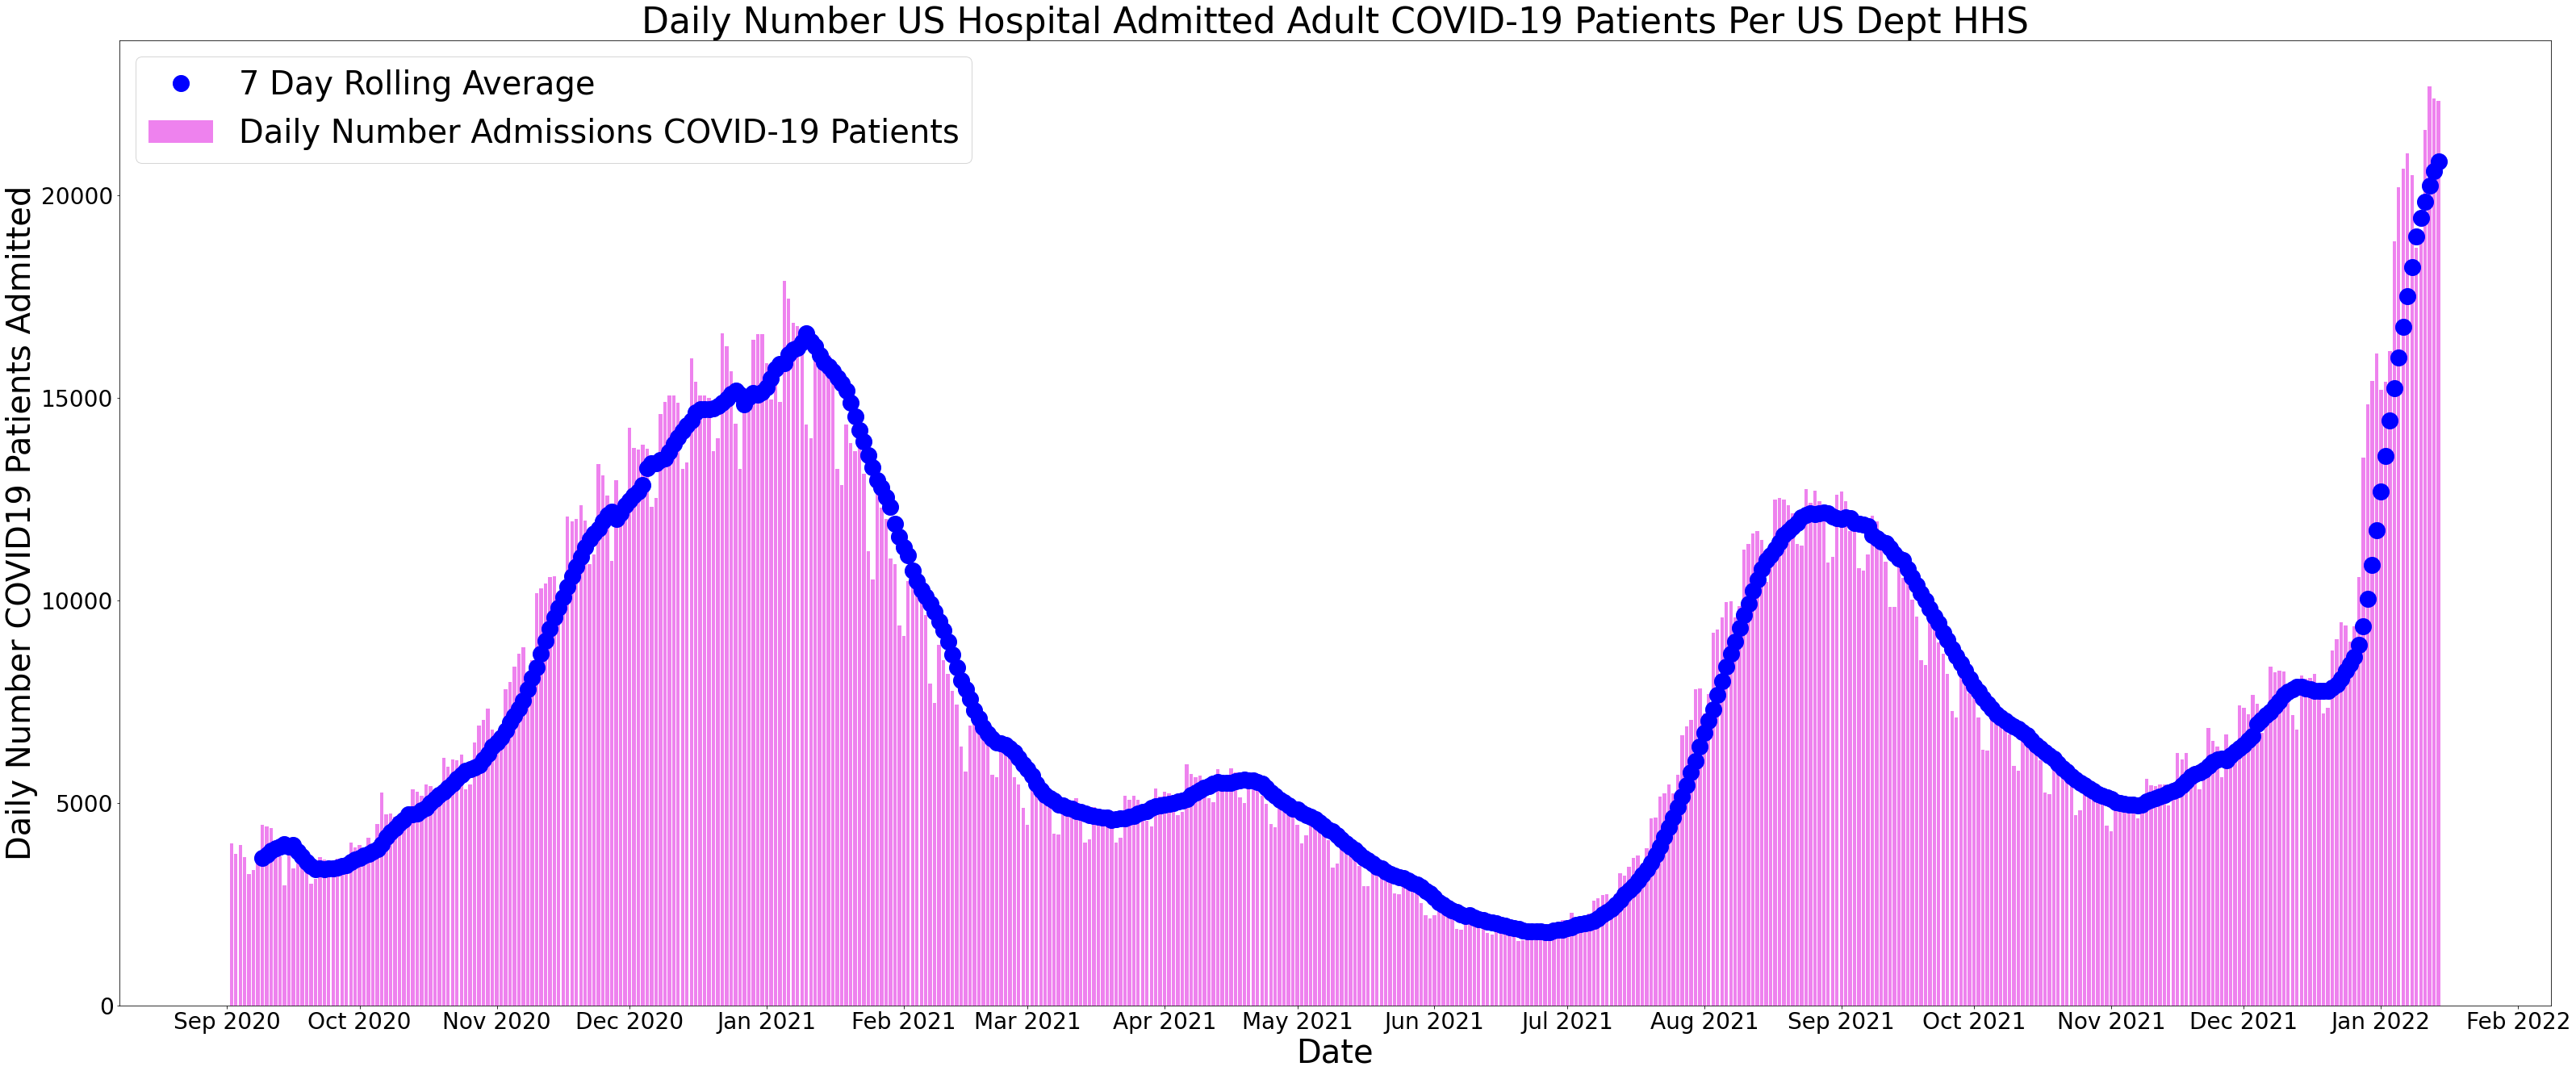

In [41]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number US Hospital Admitted Adult COVID-19 Patients Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number COVID19 Patients Admitted',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.previous_day_admission_adult_covid_confirmed, color = 'violet')
plt.plot(ccc_rolling.previous_day_admission_adult_covid_confirmed, 'bo',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Admissions COVID-19 Patients'], fontsize = 40)
fig.savefig('previous_day_admission_adult_covid_confirmed.png')

previous_day_admission_pediatric_covid_confirmed   

In [42]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['previous_day_admission_pediatric_covid_confirmed'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['previous_day_admission_pediatric_covid_confirmed'].sum()))
df_previous_day_admission_pediatric_covid_confirmed = pd.DataFrame(aaa,columns=['date', 'previous_day_admission_pediatric_covid_confirmed'])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
139.0
154.0
163.0
169.0
161.0
101.0
150.0
238.0
142.0
118.0
143.0
116.0
106.0
97.0
111.0
177.0
129.0
114.0
98.0
95.0
98.0
133.0
119.0
128.0
117.0
129.0
116.0
148.0
127.0
121.0
117.0
78.0
82.0
76.0
98.0
95.0
89.0
87.0

In [43]:
ccc = df_previous_day_admission_pediatric_covid_confirmed.set_index('date')[-500::]
ccc_rolling = ccc.rolling(7).mean().shift()

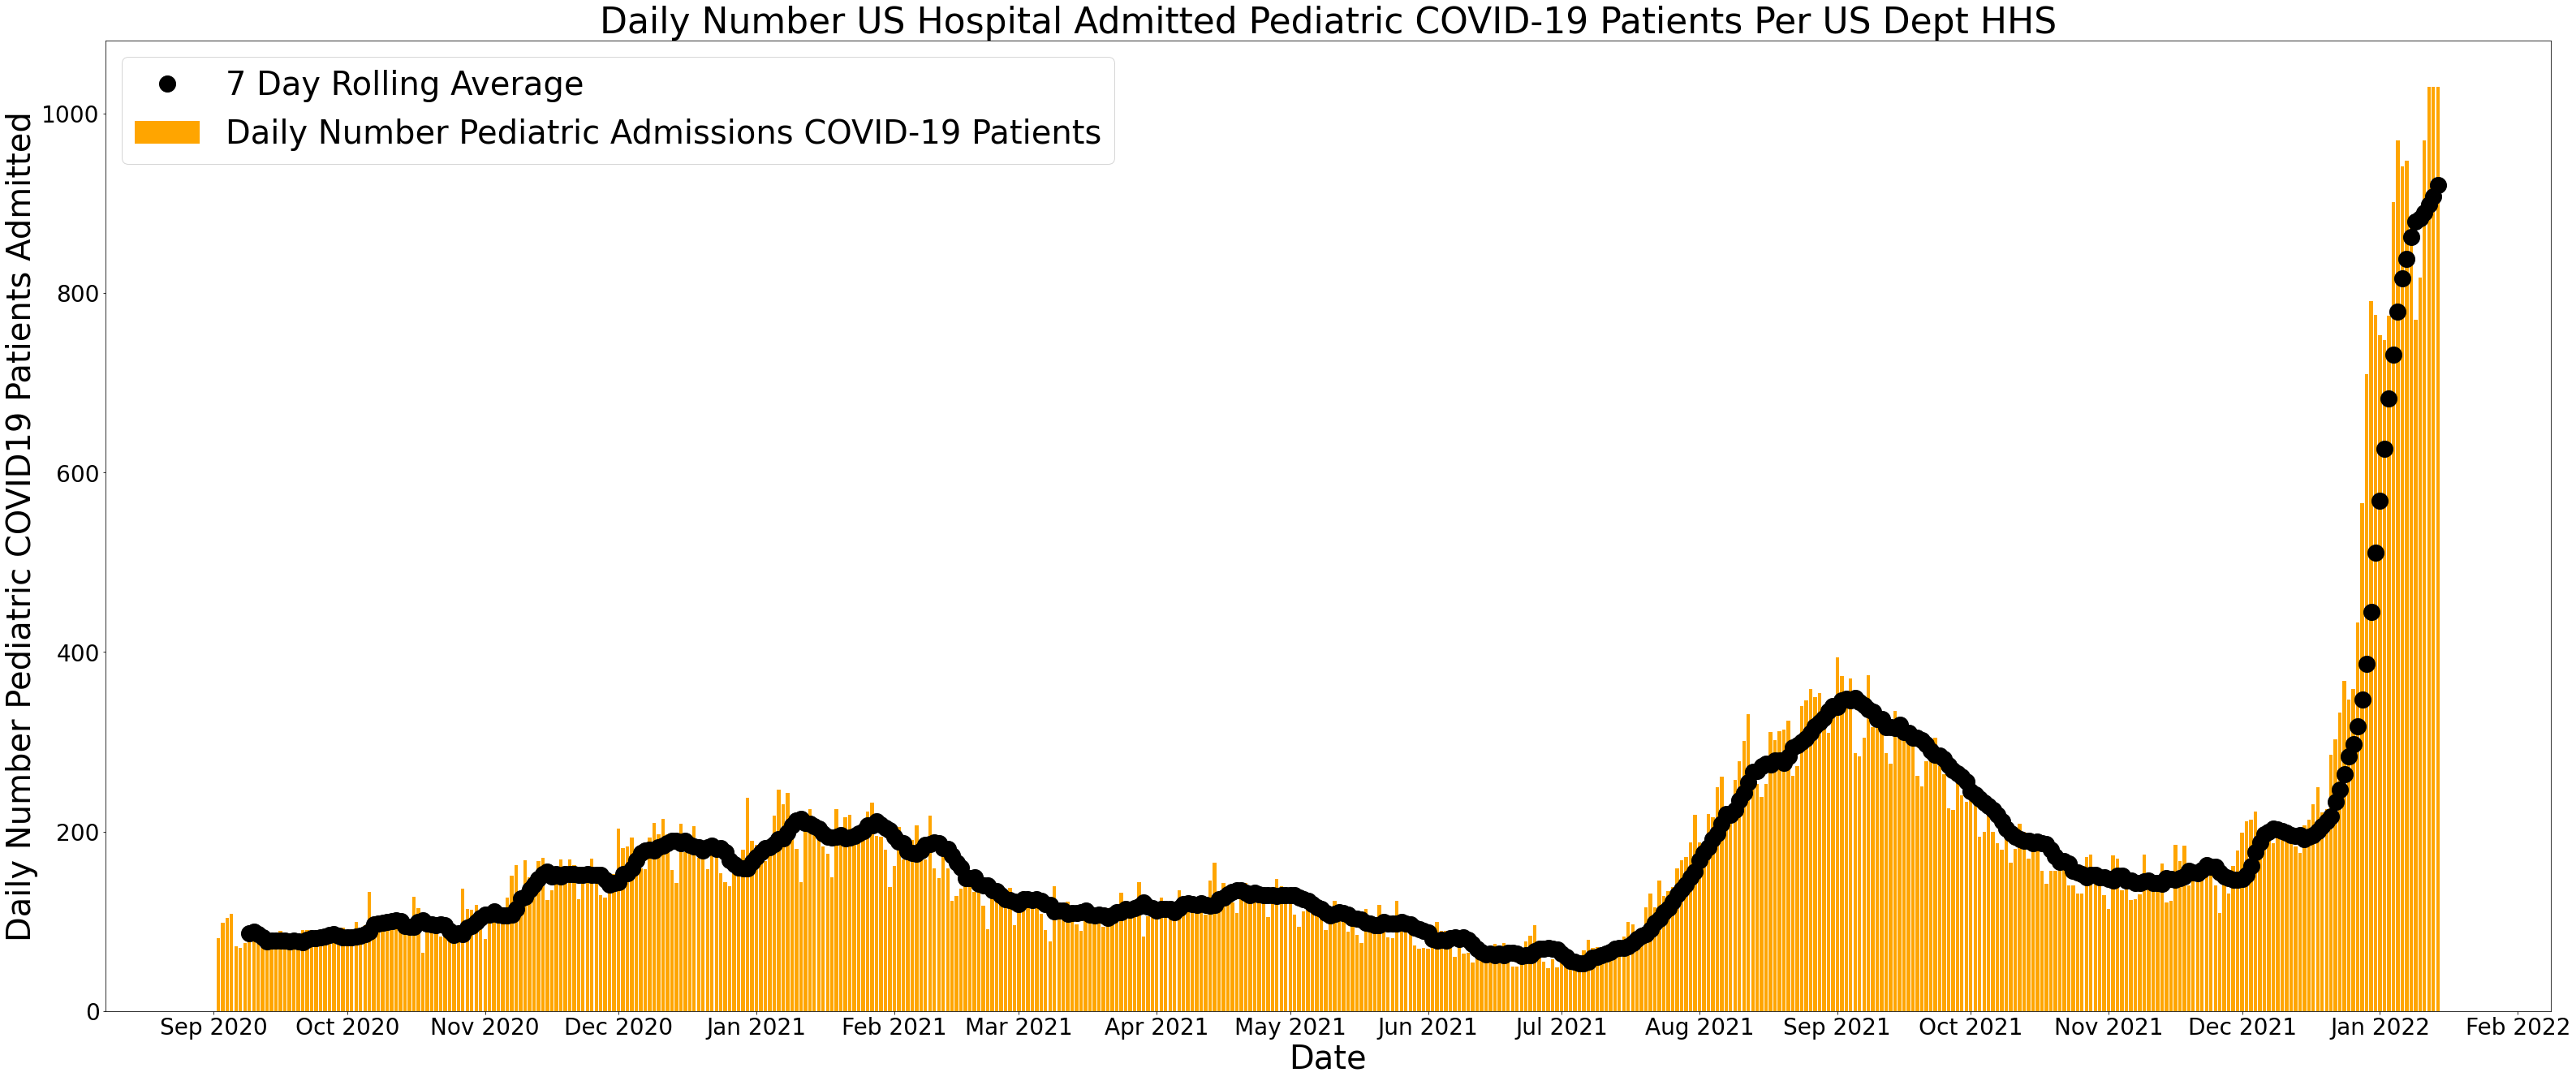

In [44]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number US Hospital Admitted Pediatric COVID-19 Patients Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number Pediatric COVID19 Patients Admitted',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.previous_day_admission_pediatric_covid_confirmed, color = 'orange')
plt.plot(ccc_rolling.previous_day_admission_pediatric_covid_confirmed, 'ko',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Pediatric Admissions COVID-19 Patients'], fontsize = 40)
fig.savefig('hhs_previous_day_admission_pediatric_covid_confirmed.png')

In [45]:
ccc.tail()

,previous_day_admission_pediatric_covid_confirmed
date,
2022-01-10,817.0
2022-01-11,970.0
2022-01-12,1030.0
2022-01-13,1030.0
2022-01-14,1030.0
